In [154]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [123]:
start_year = 2004
end_year = 2020
full_data = pd.DataFrame()
for year in range(start_year, end_year+1):
    df = pd.read_csv(os.path.join("data",f"lbj_data_{year}.csv"))
    print(f"{year}: {len(df)}")
    if full_data.empty:
        full_data = df
    else:
        full_data = pd.concat([full_data,df],ignore_index=True)
full_data.head()

2004: 79
2005: 80
2006: 79
2007: 78
2008: 75
2009: 81
2010: 76
2011: 79
2012: 62
2013: 76
2014: 77
2015: 69
2016: 76
2017: 74
2018: 82
2019: 55
2020: 62


,G,Date,Age,Tm,game_location,Opp,game_result,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,2003-10-29,18-303,CLE,@,SAC,L (-14),1.0,42:50,12.0,...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,2.0,2003-10-30,18-304,CLE,@,PHO,L (-9),1.0,40:21,8.0,...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,3.0,2003-11-01,18-306,CLE,@,POR,L (-19),1.0,39:10,3.0,...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,4.0,2003-11-05,18-310,CLE,NaN,DEN,L (-4),1.0,41:06,3.0,...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,5.0,2003-11-07,18-312,CLE,@,IND,L (-1),1.0,43:44,8.0,...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0


In [124]:
full_data["G"] = full_data["G"].apply(lambda x: int(x))

In [143]:
corr = full_data.corr()

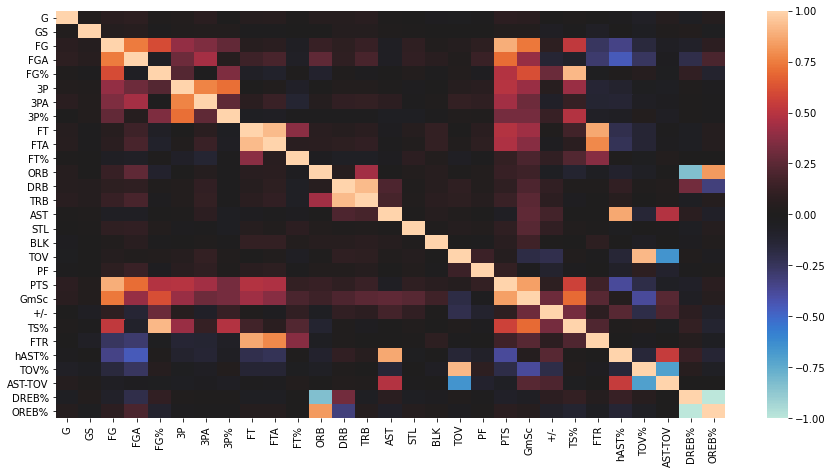

In [144]:
plt.figure(1,(15,7.5))
sns.heatmap(corr,vmin=-1,center=0,vmax=1)
plt.show()

In [145]:
def correlation_w_threshold(corr,threshold,target_col):
    corr_plus_minus = corr.loc[target_col,:]
    corr_plus_minus_above_thres = corr_plus_minus[corr_plus_minus>=threshold]
    return corr_plus_minus_above_thres.values.reshape(-1,1), corr_plus_minus_above_thres.index

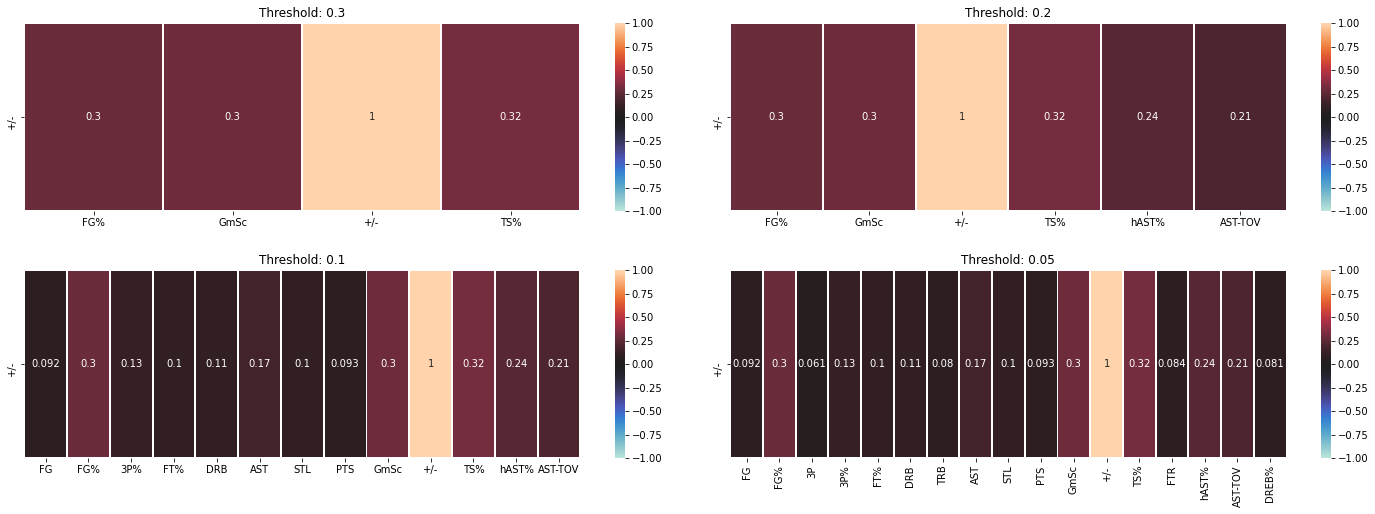

In [149]:
plt.figure(1,(20,10))
i = 0
epsilon = 0.01
for thres in [0.3,0.2,0.1,0.05]:
    i += 1
    ax = plt.subplot(3,2,i)
    corr_above_thres, corr_above_thres_cols = correlation_w_threshold(corr,thres-epsilon,"+/-")
    sns.heatmap(corr_above_thres.T,vmin=-1,vmax=1,center=0,linewidth=1,annot=True,yticklabels=["+/-"],xticklabels=corr_above_thres_cols)
    ax.set_title(f"Threshold: {thres}")
    plt.tight_layout()
plt.show()

<h2>Advanced Basketball Statistics</h2>
<ul>
    <li>True Shooting Percentage (TS%) = Pts / (2 * (FGA + .475 * FTA))</li>
    <li>Free Throw Rate (FTR) = FT / FGA
</li>
    <li>Hollinger Assist Ratio (hAST%) = AST / (FGA + .475 * FTA + AST + TOV)</li>
    <li>Turnover Percentage (TOV%) = TOV / (FGA + .475*FTA + AST + TOV)</li>
    <li>Assist to Turnover Ratio (AST-TOV) = Assists / Turnover</li>
    <li>Defensive Rebound Percentage (DREB%) = DRB / TRB</li>
    <li>Offensive Rebound Percentage (OREB%) = ORB / TRB</li>
</ul>

In [129]:
full_data["TS%"] = full_data["PTS"] / (2*(full_data["FGA"] + (0.475*full_data["FTA"])))
full_data["FTR"] = full_data["FT"] / full_data["FGA"]
full_data["hAST%"] = full_data["AST"] / (full_data["FGA"]+(0.475*full_data["FTA"])+full_data["AST"]+full_data["TOV"])
full_data["TOV%"] = full_data["TOV"] / (full_data["FGA"] + .475*full_data["FTA"] + full_data["AST"] + full_data["TOV"])
full_data["AST-TOV"] = full_data["AST"] / full_data["TOV"]
full_data["DREB%"] = full_data["DRB"] / full_data["TRB"]
full_data["OREB%"] = full_data["ORB"] / full_data["TRB"]
corr = full_data.corr()

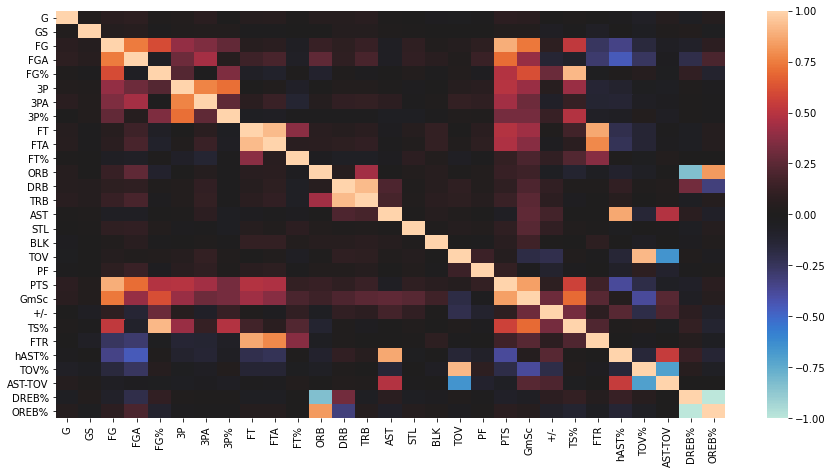

In [142]:
plt.figure(1,(15,7.5))
sns.heatmap(corr,vmin=-1,center=0,vmax=1)
plt.show()

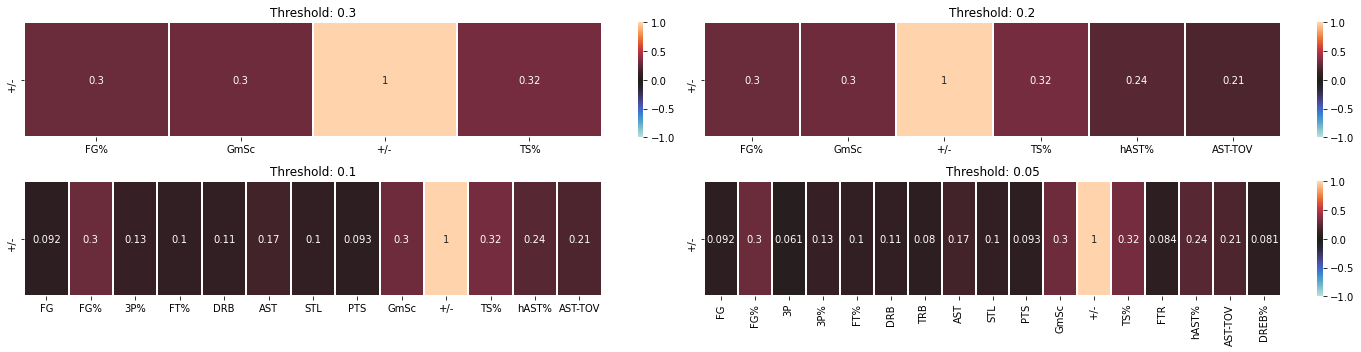

In [152]:
plt.figure(1,(20,5))
i = 0
epsilon = 0.01
thres_cols = []
for thres in [0.3,0.2,0.1,0.05]:
    i += 1
    ax = plt.subplot(2,2,i)
    corr_above_thres, corr_above_thres_cols = correlation_w_threshold(corr,thres-epsilon,"+/-")
    pair = (thres,corr_above_thres_cols)
    thres_cols.append(pair)
    sns.heatmap(corr_above_thres.T,vmin=-1,vmax=1,center=0,linewidth=1,annot=True,yticklabels=["+/-"],xticklabels=corr_above_thres_cols)
    ax.set_title(f"Threshold: {thres}")
    plt.tight_layout()
plt.show()

In [153]:
thres_cols

[(0.3, Index(['FG%', 'GmSc', '+/-', 'TS%'], dtype='object')),
 (0.2,
  Index(['FG%', 'GmSc', '+/-', 'TS%', 'hAST%', 'AST-TOV'], dtype='object')),
 (0.1,
  Index(['FG', 'FG%', '3P%', 'FT%', 'DRB', 'AST', 'STL', 'PTS', 'GmSc', '+/-',
         'TS%', 'hAST%', 'AST-TOV'],
        dtype='object')),
 (0.05,
  Index(['FG', 'FG%', '3P', '3P%', 'FT%', 'DRB', 'TRB', 'AST', 'STL', 'PTS',
         'GmSc', '+/-', 'TS%', 'FTR', 'hAST%', 'AST-TOV', 'DREB%'],
        dtype='object'))]